# **importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# importing data

In [ ]:
df=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/clusters/crime_data.csv")
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Performing EDA On Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
le = LabelEncoder()
df.iloc[:,0] = le.fit_transform(df.iloc[:,0])
df.head(4)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5


In [ ]:
df['Rape'].head(10).round()


0    21.0
1    44.0
2    31.0
3    20.0
4    41.0
5    39.0
6    11.0
7    16.0
8    32.0
9    26.0
Name: Rape, dtype: float64

In [ ]:
df.rename(columns={'Unnamed: 0':'States'},inplace=True)


In [ ]:
df.head(5)


,States,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6


# Visualization

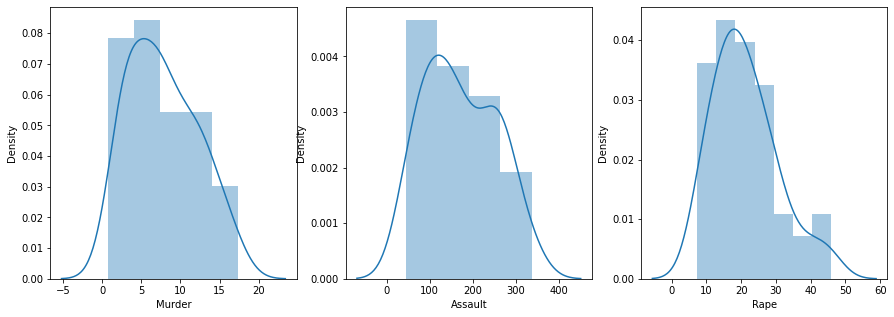

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(df['Murder'])

plt.subplot(132)
sns.distplot(df['Assault'])

plt.subplot(133)
sns.distplot(df['Rape'])

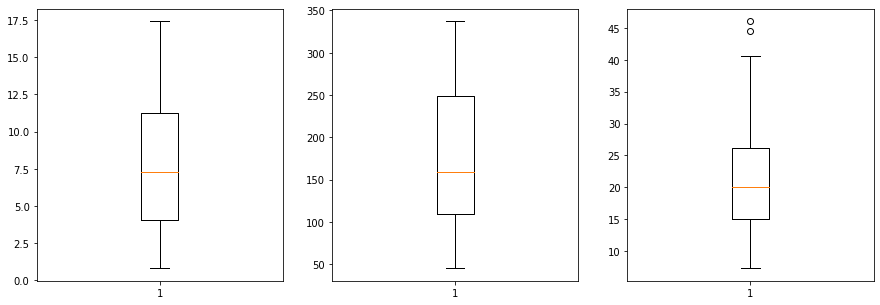

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.boxplot(df['Murder'])
plt.subplot(1,3,2)
plt.boxplot(df['Assault'])
plt.subplot(1,3,3)
x = plt.boxplot(df['Rape'])

In [ ]:
[i.get_ydata() for i in x['fliers']]


[array([44.5, 46. ])]

# **Clustering**
# Hierarchial

In [ ]:
# Normalization = (x-x(mean))/(x(max)-x(min))

def norm_func (n):
    g = (n-n.min())/(n.max()-n.min())
    return g

In [ ]:
crimeF = norm_func(df)


In [ ]:
crimeF.head(10)


,States,Murder,Assault,UrbanPop,Rape
0,0.000000,0.746988,0.654110,0.440678,0.359173
1,0.020408,0.554217,0.746575,0.271186,0.961240
2,0.040816,0.439759,0.852740,0.813559,0.612403
3,0.061224,0.481928,0.496575,0.305085,0.315245
4,0.081633,0.493976,0.791096,1.000000,0.860465
5,0.102041,0.427711,0.544521,0.779661,0.811370
6,0.122449,0.150602,0.222603,0.762712,0.098191
7,0.142857,0.307229,0.660959,0.677966,0.219638
8,0.163265,0.879518,0.993151,0.813559,0.635659
9,0.183673,1.000000,0.568493,0.474576,0.478036


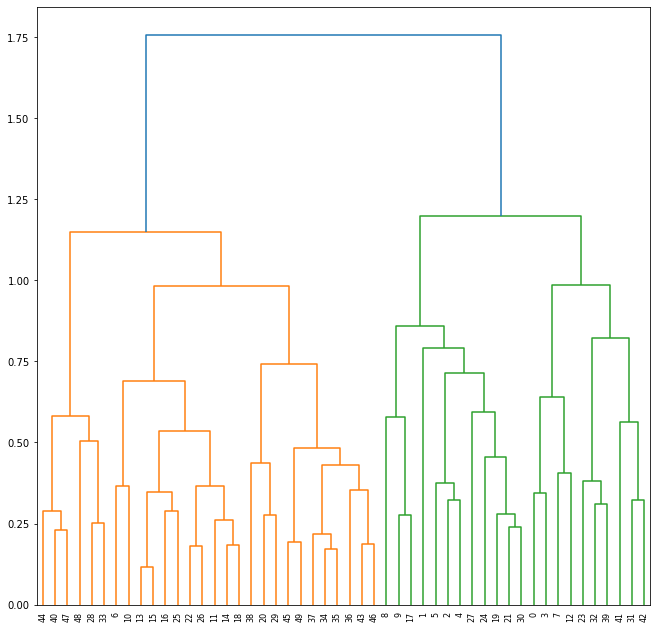

In [ ]:
#Create the dendogram
plt.figure(figsize=(11,11))
dendrogram = sch.dendrogram(sch.linkage(crimeF, method='complete'))

In [ ]:
hcc = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')


In [ ]:
hcc

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [ ]:
hcc.fit(crimeF)


AgglomerativeClustering(linkage='complete', n_clusters=7)

In [ ]:
hcc_y = hcc.fit_predict(crimeF)


In [ ]:
hcc_y

array([4, 1, 1, 4, 1, 1, 5, 4, 6, 6, 5, 5, 4, 5, 5, 5, 5, 6, 5, 1, 2, 1,
       5, 0, 1, 5, 5, 1, 3, 2, 1, 0, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 0, 2,
       3, 2, 2, 3, 3, 2])

In [ ]:
df['Cluster ID'] = hcc_y


In [ ]:
df


,States,Murder,Assault,UrbanPop,Rape,Cluster ID
0,0,13.2,236,58,21.2,4
1,1,10.0,263,48,44.5,1
2,2,8.1,294,80,31.0,1
3,3,8.8,190,50,19.5,4
4,4,9.0,276,91,40.6,1
5,5,7.9,204,78,38.7,1
6,6,3.3,110,77,11.1,5
7,7,5.9,238,72,15.8,4
8,8,15.4,335,80,31.9,6
9,9,17.4,211,60,25.8,6


In [ ]:
df.groupby('Cluster ID').agg(['mean']).reset_index()


,Cluster ID,States,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean,mean
0,0,34.666667,13.416667,253.000000,60.333333,22.366667
1,1,14.777778,10.111111,256.333333,73.222222,36.000000
2,2,37.454545,5.709091,145.454545,74.454545,19.490909
3,3,40.000000,2.866667,61.666667,47.000000,10.150000
4,4,5.500000,9.575000,228.250000,65.750000,20.125000
5,5,16.000000,4.672727,94.090909,62.363636,15.245455
6,6,11.333333,16.066667,265.000000,68.666667,26.633333


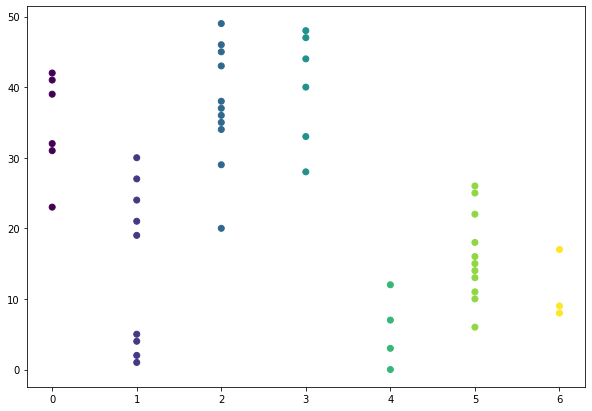

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df['Cluster ID'],df['States'], c=hcc_y)

# Kmeans Clustering

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# minmaxscalar
scaled_crime = scaler.fit_transform(df.iloc[:,1:])

In [ ]:
scaled_crime


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.66639705],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.94585388],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.94585388],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.66639705],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.94585388],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.94585388],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  1.20381403],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.66639705],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.741231  ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.741231  ],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  1.20381403],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.20381403],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.66639705],
       [-0.13637203, -0.70012057, -0.0

In [ ]:
for i in range(1,4):
    print(i)

1
2
3


In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_crime)
inertia = []
inertia.append(kmeans.inertia_)

In [ ]:
inertia

[91.3458771782397]

In [ ]:
kmeans.inertia_

91.3458771782397

In [ ]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    inertia.append(kmeans.inertia_)
    if i >2 :
        break

In [ ]:
inertia

[250.0, 145.14089224567715, 116.87683707097221]

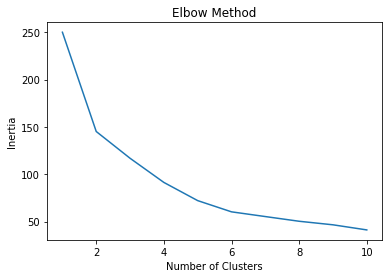

In [ ]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Building clustering algorithm
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=5, random_state=42)

In [ ]:
clusters_new.labels_


array([3, 1, 1, 0, 1, 1, 0, 2, 3, 3, 2, 0, 3, 0, 0, 0, 0, 3, 0, 1, 2, 1,
       0, 4, 1, 0, 0, 1, 0, 2, 1, 1, 4, 0, 2, 2, 2, 2, 2, 4, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
df['KMeans cluster ID'] = clusters_new.labels_


In [ ]:
df.head(10)


,States,Murder,Assault,UrbanPop,Rape,Cluster ID,KMeans cluster ID
0,0,13.2,236,58,21.2,4,3
1,1,10.0,263,48,44.5,1,1
2,2,8.1,294,80,31.0,1,1
3,3,8.8,190,50,19.5,4,0
4,4,9.0,276,91,40.6,1,1
5,5,7.9,204,78,38.7,1,1
6,6,3.3,110,77,11.1,5,0
7,7,5.9,238,72,15.8,4,2
8,8,15.4,335,80,31.9,6,3
9,9,17.4,211,60,25.8,6,3


In [ ]:
#Clusterwise Grouping og mean of dataset
df.groupby('KMeans cluster ID').agg(['mean']).reset_index()

,KMeans cluster ID,States,Murder,Assault,UrbanPop,Rape,Cluster ID
,,mean,mean,mean,mean,mean,mean
0,0,24.058824,4.241176,91.117647,55.000000,13.405882,4.235294
1,1,20.583333,10.666667,245.833333,73.666667,33.541667,0.750000
2,2,33.000000,5.692308,144.923077,74.923077,19.261538,2.384615
3,3,9.200000,14.360000,256.000000,69.400000,25.020000,5.200000
4,4,31.333333,14.500000,291.666667,45.666667,18.566667,0.000000


In [ ]:
(df[df['KMeans cluster ID']==0]).value_counts().sum()


17

In [ ]:

for i in range(0,5):
    n = df[df['KMeans cluster ID']==i].value_counts().sum()
    print('Cluster No','-', i, ';' , 'Count','-',n)
    print('_____________________________________________________________________________')
    print('\n', df[df['KMeans cluster ID']==i] )
    print('_____________________________________________________________________________')

Cluster No - 0 ; Count - 17
_____________________________________________________________________________

     States  Murder  Assault  UrbanPop  Rape  Cluster ID  KMeans cluster ID
3        3     8.8      190        50  19.5           4                  0
6        6     3.3      110        77  11.1           5                  0
11      11     2.6      120        54  14.2           5                  0
13      13     7.2      113        65  21.0           5                  0
14      14     2.2       56        57  11.3           5                  0
15      15     6.0      115        66  18.0           5                  0
16      16     9.7      109        52  16.3           5                  0
18      18     2.1       83        51   7.8           5                  0
22      22     2.7       72        66  14.9           5                  0
25      25     6.0      109        53  16.4           5                  0
26      26     4.3      102        62  16.5           5            

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
array = df.values
array

array([[  0. ,  13.2, 236. ,  58. ,  21.2,   4. ,   3. ],
       [  1. ,  10. , 263. ,  48. ,  44.5,   1. ,   1. ],
       [  2. ,   8.1, 294. ,  80. ,  31. ,   1. ,   1. ],
       [  3. ,   8.8, 190. ,  50. ,  19.5,   4. ,   0. ],
       [  4. ,   9. , 276. ,  91. ,  40.6,   1. ,   1. ],
       [  5. ,   7.9, 204. ,  78. ,  38.7,   1. ,   1. ],
       [  6. ,   3.3, 110. ,  77. ,  11.1,   5. ,   0. ],
       [  7. ,   5.9, 238. ,  72. ,  15.8,   4. ,   2. ],
       [  8. ,  15.4, 335. ,  80. ,  31.9,   6. ,   3. ],
       [  9. ,  17.4, 211. ,  60. ,  25.8,   6. ,   3. ],
       [ 10. ,   5.3,  46. ,  83. ,  20.2,   5. ,   2. ],
       [ 11. ,   2.6, 120. ,  54. ,  14.2,   5. ,   0. ],
       [ 12. ,  10.4, 249. ,  83. ,  24. ,   4. ,   3. ],
       [ 13. ,   7.2, 113. ,  65. ,  21. ,   5. ,   0. ],
       [ 14. ,   2.2,  56. ,  57. ,  11.3,   5. ,   0. ],
       [ 15. ,   6. , 115. ,  66. ,  18. ,   5. ,   0. ],
       [ 16. ,   9.7, 109. ,  52. ,  16.3,   5. ,   0. ],
       [ 17. ,

In [ ]:
ss = StandardScaler()
x = ss.fit_transform(array)

In [ ]:
x

array([[-1.69774938,  1.25517927,  0.79078716, -0.52619514, -0.00345116,
         0.66639705,  1.41177316],
       [-1.62845348,  0.51301858,  1.11805959, -1.22406668,  2.50942392,
        -0.94585388, -0.24913644],
       [-1.55915759,  0.07236067,  1.49381682,  1.00912225,  1.05346626,
        -0.94585388, -0.24913644],
       [-1.4898617 ,  0.23470832,  0.23321191, -1.08449238, -0.18679398,
         0.66639705, -1.07959124],
       [-1.4205658 ,  0.28109336,  1.2756352 ,  1.77678094,  2.08881393,
        -0.94585388, -0.24913644],
       [-1.35126991,  0.02597562,  0.40290872,  0.86954794,  1.88390137,
        -0.94585388, -0.24913644],
       [-1.28197402, -1.04088037, -0.73648418,  0.79976079, -1.09272319,
         1.20381403, -1.07959124],
       [-1.21267813, -0.43787481,  0.81502956,  0.45082502, -0.58583422,
         0.66639705,  0.58131836],
       [-1.14338223,  1.76541475,  1.99078607,  1.00912225,  1.1505301 ,
         1.741231  ,  1.41177316],
       [-1.07408634,  2.2292

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
cl = pd.DataFrame(dbscan.labels_,columns=['DBSCAN cluster'])
cl

,DBSCAN cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df['DBSCAN Clusters'] = dbscan.labels_


In [ ]:
df

,States,Murder,Assault,UrbanPop,Rape,Cluster ID,KMeans cluster ID,DBSCAN Clusters
0,0,13.2,236,58,21.2,4,3,0
1,1,10.0,263,48,44.5,1,1,0
2,2,8.1,294,80,31.0,1,1,0
3,3,8.8,190,50,19.5,4,0,0
4,4,9.0,276,91,40.6,1,1,0
5,5,7.9,204,78,38.7,1,1,0
6,6,3.3,110,77,11.1,5,0,0
7,7,5.9,238,72,15.8,4,2,0
8,8,15.4,335,80,31.9,6,3,0
9,9,17.4,211,60,25.8,6,3,0


In [ ]:
for i in range(0,2):
    n = df[df['DBSCAN Clusters']==i].value_counts().sum()
    print('Cluster No','-', i, ';' , 'Count','-',n)
    print('_____________________________________________________________________________')
    print('\n', df[df['DBSCAN Clusters']==i] )
    print('_____________________________________________________________________________')

Cluster No - 0 ; Count - 50
_____________________________________________________________________________

     States  Murder  Assault  UrbanPop  Rape  Cluster ID  KMeans cluster ID  \
0        0    13.2      236        58  21.2           4                  3   
1        1    10.0      263        48  44.5           1                  1   
2        2     8.1      294        80  31.0           1                  1   
3        3     8.8      190        50  19.5           4                  0   
4        4     9.0      276        91  40.6           1                  1   
5        5     7.9      204        78  38.7           1                  1   
6        6     3.3      110        77  11.1           5                  0   
7        7     5.9      238        72  15.8           4                  2   
8        8    15.4      335        80  31.9           6                  3   
9        9    17.4      211        60  25.8           6                  3   
10      10     5.3       46       

In [ ]:
df.head(2)


,States,Murder,Assault,UrbanPop,Rape,Cluster ID,KMeans cluster ID,DBSCAN Clusters
0,0,13.2,236,58,21.2,4,3,0
1,1,10.0,263,48,44.5,1,1,0
